# Healthcare in Different States

In this project, we will use boxplots to investigate the way hospitals in different states across the United States charge their patients for medical procedures.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',None)

In [2]:
healthcare = pd.read_csv('healthcare.csv')
healthcare.head(2)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71


In [3]:
healthcare.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

In [4]:
len(healthcare)

163065

We’re going to focus on only the ways in which hospitals charge patients for chest pain.

In [5]:
healthcare['DRG Definition'].unique()

array(['039 - EXTRACRANIAL PROCEDURES W/O CC/MCC',
       '057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC',
       '069 - TRANSIENT ISCHEMIA',
       '064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC',
       '065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC',
       '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC',
       '074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC',
       '101 - SEIZURES W/O MCC', '149 - DYSEQUILIBRIUM',
       '176 - PULMONARY EMBOLISM W/O MCC',
       '177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC',
       '189 - PULMONARY EDEMA & RESPIRATORY FAILURE',
       '178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC',
       '190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC',
       '191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC',
       '193 - SIMPLE PNEUMONIA & PLEURISY W MCC',
       '194 - SIMPLE PNEUMONIA & PLEURISY W CC',
       '192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/O CC/MCC',
       '195 - SIMPLE P

In [6]:
chest_pain = healthcare[healthcare['DRG Definition'] == '313 - CHEST PAIN']
chest_pain.head(2)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
80531,313 - CHEST PAIN,220108,MILTON HOSPITAL INC,199 REEDSDALE ROAD,MILTON,MA,2186,MA - Boston,43,6760.53,3547.00,2633.04
82205,313 - CHEST PAIN,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,36,19540.55,3428.58,2093.38


In [7]:
len(chest_pain)

2230

Separating By State

AL - Alabama

In [8]:
alabama_chest_pain = chest_pain[chest_pain['Provider State'] == 'AL']
alabama_chest_pain.head(2)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
82205,313 - CHEST PAIN,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,36,19540.55,3428.58,2093.38
82206,313 - CHEST PAIN,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,13,20241.84,3849.76,1704.53


In [9]:
len(alabama_chest_pain)

52

In [10]:
alabama_cost = alabama_chest_pain[' Average Covered Charges ']
alabama_cost.values

array([19540.55, 20241.84,  6417.2 , 13311.78, 21375.25, 12569.92,
       12072.04,  9999.98,  7274.72,  6660.36, 15449.91,  9091.22,
       20074.9 , 21093.72, 39035.25, 23769.85,  4868.25, 18100.56,
        4308.61, 23505.03, 17560.85, 10957.75,  6935.45,  7216.7 ,
       14627.35,  7006.38, 24424.71,  8700.78, 12268.8 , 15938.66,
       11746.9 , 12790.15,  6131.62,  9824.6 , 11883.65, 13602.91,
       28750.57, 13358.27,  4610.73, 13840.5 , 14490.31, 12698.  ,
       10512.09,  7770.77, 22905.23, 33436.72, 11779.69, 20088.64,
        9561.2 , 10494.45, 14002.31, 14100.38])

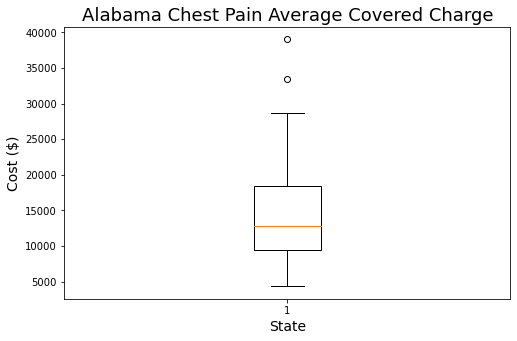

In [11]:
plt.figure(figsize=(8,5))

plt.boxplot(alabama_cost)
plt.title('Alabama Chest Pain Average Covered Charge', fontsize=18)
plt.xlabel('State', fontsize=14)
plt.ylabel('Cost ($)', fontsize=14)

plt.show()

Making a Boxplot for All States Average Covered Charges for Chest Pain

In [14]:
states_chest_pain = chest_pain['Provider State'].unique()
states_chest_pain

array(['MA', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL',
       'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [15]:
dataset = []

for state in states_chest_pain:
    dataset.append(chest_pain[chest_pain['Provider State'] == state][' Average Covered Charges '].values)

# dataset

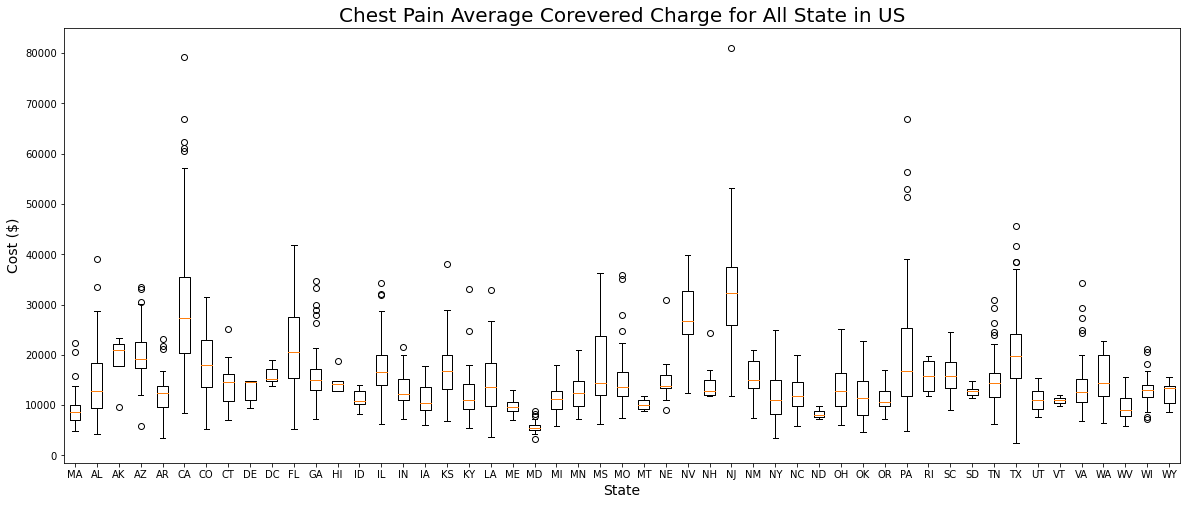

In [17]:
plt.figure(figsize=(20,8))

plt.boxplot(dataset, labels = states_chest_pain)
plt.title('Chest Pain Average Corevered Charge for All State in US', fontsize=20)
plt.xlabel('State', fontsize=14)
plt.ylabel('Cost ($)', fontsize=14)

plt.show()

What information have you learned by looking at these boxplots side by side? What state has the largest spread? What state has the largest median? Which states have the most outliers?

Answer :
State has the largest spread is CA-California, NJ-New Jersey, FL-Florida. VT-Vermont almost has no spread. 
State with the largest median cost for a chest pain is NJ-New Jersey. The state with the smallest median cost is MD-Maryland.
CA-California, GA-Goergia, and TN-Tenesse all have a fair number of outliers.

Making a Boxplot for All States Average Medicare Payment for Chest Pain

In [30]:
dataset_tot_payment = []

for state in states_chest_pain:
    dataset_tot_payment.append(chest_pain[chest_pain['Provider State'] == state]['Average Medicare Payments'].values)
    
# dataset_tot_payment

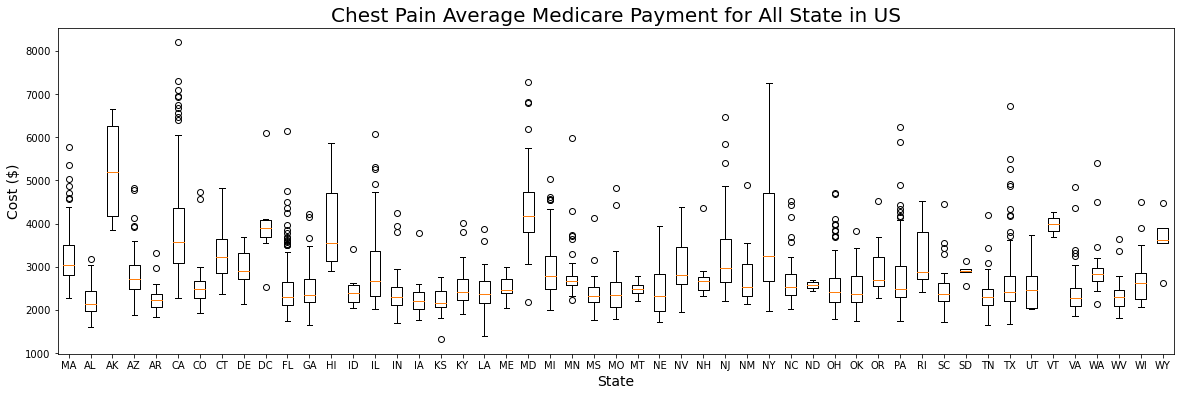

In [32]:
plt.figure(figsize=(20,6))

plt.boxplot(dataset_tot_payment, labels=states_chest_pain)
plt.title('Chest Pain Average Medicare Payment for All State in US', fontsize=20)
plt.xlabel('State', fontsize=14)
plt.ylabel('Cost ($)', fontsize=14)

plt.show()

State has the largest spread is NY-New York and CA-California. ND-North Dakota almost has no spread. 
State with the largest median cost for a chest pain is AK-Alaska. The state with the smallest median cost is Al-Albama. 
CA-California, FL-Florida,PA-Pennsylvania and TX-Texas all have a fair number of outliers.

Average Total Payment for 194-SIMPLE PNEUMONIA & PLEURISY W CC by States

In [20]:
illness_count = healthcare.groupby('DRG Definition')['Provider Id'].count()
illness_count

DRG Definition
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC                                      1079
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC                           1201
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC                    1659
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC                     2269
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC               1806
069 - TRANSIENT ISCHEMIA                                                      1962
074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC                             979
101 - SEIZURES W/O MCC                                                        1593
149 - DYSEQUILIBRIUM                                                           988
176 - PULMONARY EMBOLISM W/O MCC                                              1396
177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC                            1894
178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC                       

In [21]:
simple_pneumonia = healthcare[healthcare['DRG Definition'] == '194 - SIMPLE PNEUMONIA & PLEURISY W CC']
len(simple_pneumonia)

3023

In [22]:
states_simple_pneumonia = simple_pneumonia['Provider State'].unique()
states_simple_pneumonia

array(['CA', 'CT', 'FL', 'AL', 'AK', 'AZ', 'AR', 'CO', 'DE', 'DC', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'NH', 'MS', 'MO', 'MT', 'NE', 'NV', 'NJ', 'NM', 'NY',
       'NC', 'OR', 'ND', 'OH', 'OK', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WI', 'WA', 'WV', 'WY'], dtype=object)

In [23]:
dataset_cost_pneumonia = []

for state in states_chest_pain:
    dataset_cost_pneumonia.append(simple_pneumonia[simple_pneumonia['Provider State'] == state][' Average Total Payments '].values)
    
# dataset_cost_pneumonia

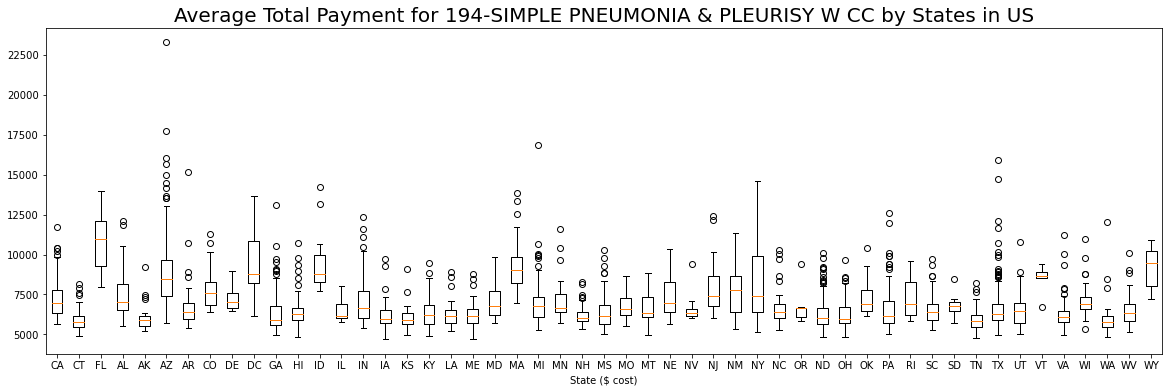

In [24]:
plt.figure(figsize=(20,6))

plt.boxplot(dataset_cost_pneumonia, labels=states_simple_pneumonia)
plt.title('Average Total Payment for 194-SIMPLE PNEUMONIA & PLEURISY W CC by States in US', fontsize=20)
plt.xlabel('State ($ cost)')

plt.show()

State has the largest spread is NY-New York, CA-California and TX-Texas. NH-New Hampshore almost has no spread with one outlier. 
State with the largest median cost for a chest pain is AK-Alaska. The state with the smallest median cost is Al-Albama. 
TX-Texas and CA-California all have a fair number of outliers.